# EXPERIMENTS

## initialization
 * Do not forget to turn on the amplifier of the photodiode.

In [1]:
import measurement_device as md
import simulation.simulation as sim
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.signal
import scipy.fft as fft
import pickle
from time import time
from scipy.io import wavfile

Device(name=Dev1)
Device(name=simDev1)
write the device name to use: Dev1


## Experiment 1: cos signal
 sending a cos wave signal
### wave characteristics:
  * $$ f = 570 \left[Hz\right] $$
  * $$ A = \frac{1}{2} \left[v\right] $$
  * $$ \text{offset} = 3 \left[v\right] $$

### measurements characteristics:
  * $$ f = 1e4 \left[Hz\right] $$
  * $$ \text{duration} = 1 \left[s\right] $$

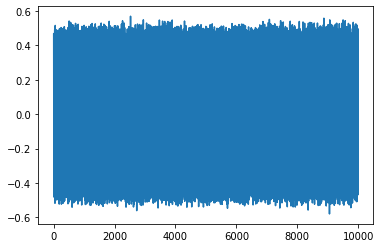

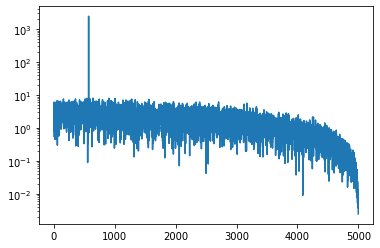

In [4]:
f = 570 # Hz
amp = 0.5 # v
offset = 3 # v
duration = 1 # Sec
rate = 10_000 # Hz
filename = f"measurments\cosSignal\cos_wave_f{f}amp{amp}of{offset}.pickle"
t = np.linspace(0, duration, round(duration * rate))
sig = np.cos(f * 2 * np.pi * t) * amp
values = md.take_measurements(sig, rate, offset)
plt.plot(values)
plt.show()
sim.show_fft(values, duration)
with open(filename, "wb+") as f:
    pickle.dump({"signal": sig, "received": values, "interval": duration, "rate": rate, "time": time()}, f)


## Experiment 2: square signal
 * write the details of the experiment

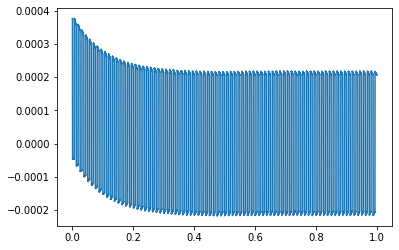

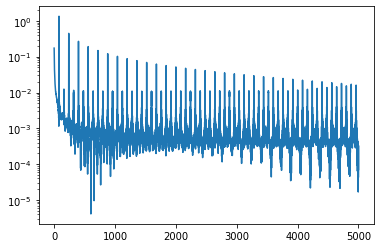

In [8]:
f = 80 # Hz
amp = 0.5 # v
offset = 3 # v
duration = 1 # Sec
rate = 10_000 # Hz
filename = f"measurments\square\square_wave_f{f}.pickle"
t = np.linspace(0, duration, round(duration * rate))
sig = sp.signal.square(f*t*2*np.pi)
values = md.take_measurements(sig, rate, offset)
plt.plot(t, values)
plt.show()
sim.show_fft(values, duration)
with open(filename, "wb+") as file:
    pickle.dump({"signal": sig, "received": values, "interval": duration, "rate": rate, "time": time(),  "data freq": f}, file)

## Experiment 3: triangle signal.
 * write the details of the experiment

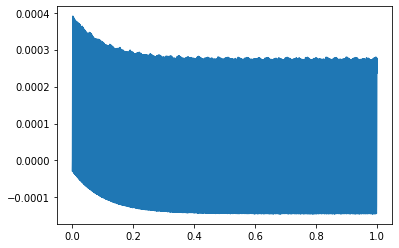

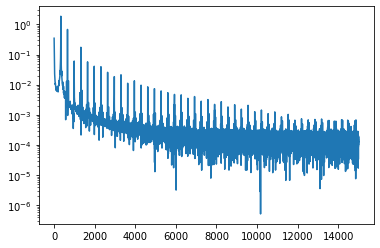

In [13]:
f = 330 # Hz
amp = 0.5 # v
offset = 5 # v
duration = 1 # Sec
rate = 30_000 # Hz
filename = f"measurments\triangle\triangle_wave_f{f}of{offset}amp{amp}.pickle"
t = np.linspace(0, duration, round(duration * rate))
sig = sp.signal.sawtooth(t*f*2*np.pi, width=0.5)
values = md.take_measurements(sig, rate, offset)
plt.plot(t, values)
plt.show()
sim.show_fft(values, duration)
with open(filename, "wb+") as file:
    pickle.dump({"signal": sig, "received": values, "interval": duration, "rate": rate, "time": time(),  "data freq": f}, file)

## Experiment 4: Amplitude Modulation
send data using amplitude modulation.
### Carrier wave:
  * $$ f = 5020 \left[Hz\right] $$
  * $$ A = 1 \left[v\right] $$
  * $$ \text{offset} = 3 \left[v\right] $$

### Message data:
  Cosine wave with the characteristics:
  * $$ f = 50 \left[Hz\right] $$
  * $$ A = \frac{1}{2} \left[v\right] $$

### measurment characteristics:
  * $$ f = 1e4 \left[Hz\right] $$
  * $$ \text{duration} = 2 \left[sec\right] $$

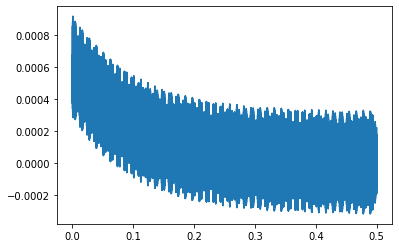

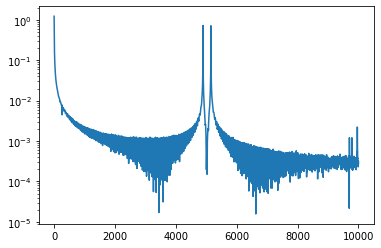

(array([0.00000000e+00, 2.00040008e+00, 4.00080016e+00, ...,
        9.99599920e+03, 9.99799960e+03, 1.00000000e+04]),
 array([1.23760096e+00, 7.58126141e-01, 4.46613488e-01, ...,
        3.23712313e-04, 3.06230154e-04, 2.71765414e-04]))

In [20]:
fr = 130 # Hz
fc = 5020# Hz
amp = 1 # v
mod_offset = 0 # v
offset = 5 # v
duration = 0.5 # Sec
rate = 20_000 # Hz
filename = f"measurments\am\am_cos_fr{fr}fc{fc}modoff{mod_offset}.pickle"
t = np.linspace(0, duration, round(duration * rate))

msg = amp*np.cos(t*fr*2*np.pi)
am = lambda msg: msg*np.cos(t*fc*2*np.pi)
sig = am(msg+mod_offset)

rx = md.take_measurements(sig, rate, offset)

with open(filename, "wb+") as f:
    pickle.dump(
        {
            "signal": sig,
            "received": rx,
            "interval": duration,
            "rate": rate,
            "time": time(),
            "data freq": fr,
            "carrier freq":fc,
            "data amp": amp,
            "modulation offset":mod_offset,
            "tx_offset": offset,
            "time line": t
        }, f)


plt.plot(t, rx)
plt.show()
sim.show_fft(rx, duration)


# plt.plot(am_sig)
# plt.show()
# sig_fft = fft.fftshift(fft.fft(am_sig))
# frequencies = fft.fftfreq(msg.size, 1/rate)
# plt.plot(fft.fftshift(frequencies), np.real(fft.fftshift(fft.fft(msg))), "r")
# plt.plot(fft.fftshift(frequencies), np.imag(fft.fftshift(fft.fft(msg))), "g")
# plt.title("origin fft")
# plt.show()


-5020.0


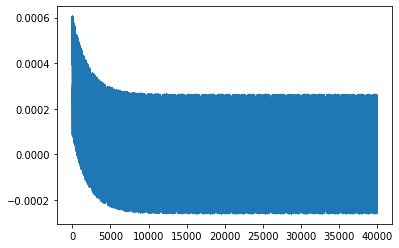

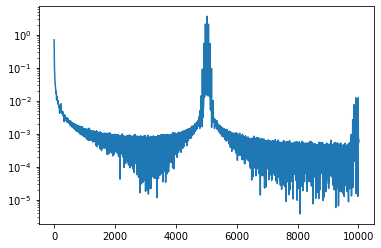

(array([0.00000000e+00, 5.00025001e-01, 1.00005000e+00, ...,
        9.99899995e+03, 9.99949997e+03, 1.00000000e+04]),
 array([6.93584930e-01, 6.81684971e-01, 6.01024200e-01, ...,
        5.65937973e-04, 6.86250076e-04, 5.86398790e-04]))

In [21]:
fr = 50 # Hz
fc = 5_020# Hz
amp = 1 # v
duration = 2 # Sec
rate = 20_000 # Hz
offset = 4 # v
filename = f"measurments\pm\pm_cos_fr{fr}fc{fc}.pickle"
t = np.linspace(0, duration, round(duration * rate))

msg = amp*np.cos(t*fr*2*np.pi)
pm = lambda msg: np.cos(t*fc*2*np.pi + msg)
sig = pm(msg)

rx = md.take_measurements(sig, rate, offset)

with open(filename, "wb+") as f:
    pickle.dump(
        {
            "signal": sig,
            "received": rx,
            "interval": duration,
            "rate": rate,
            "time": time(),
            "data freq": fr,
            "carrier freq":fc,
            "data amp": amp,
            "tx_offset": offset,
            "time line": t
        }, f)


plt.plot(rx)
plt.show()
sim.show_fft(rx, duration)

## nyquist frequency

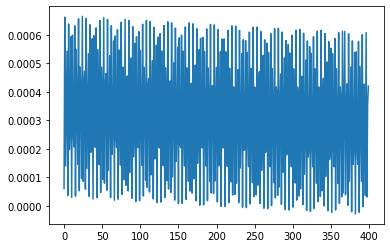

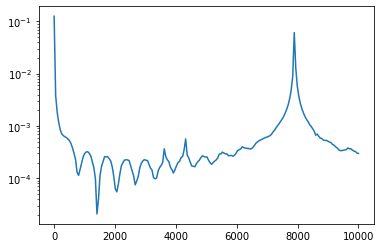

(array([    0.        ,    50.25125628,   100.50251256,   150.75376884,
          201.00502513,   251.25628141,   301.50753769,   351.75879397,
          402.01005025,   452.26130653,   502.51256281,   552.7638191 ,
          603.01507538,   653.26633166,   703.51758794,   753.76884422,
          804.0201005 ,   854.27135678,   904.52261307,   954.77386935,
         1005.02512563,  1055.27638191,  1105.52763819,  1155.77889447,
         1206.03015075,  1256.28140704,  1306.53266332,  1356.7839196 ,
         1407.03517588,  1457.28643216,  1507.53768844,  1557.78894472,
         1608.04020101,  1658.29145729,  1708.54271357,  1758.79396985,
         1809.04522613,  1859.29648241,  1909.54773869,  1959.79899497,
         2010.05025126,  2060.30150754,  2110.55276382,  2160.8040201 ,
         2211.05527638,  2261.30653266,  2311.55778894,  2361.80904523,
         2412.06030151,  2462.31155779,  2512.56281407,  2562.81407035,
         2613.06532663,  2663.31658291,  2713.5678392 ,  2763.81

In [6]:
fr = 12_111 # Hz
amp = 1 # v
duration = .02 # Sec
rate = 20_000 # Hz
offset = 4 # v
filename = f"measurments\nyquist\nyquist_fr{fr}rate{rate}d{duration}.pickle"
t = np.linspace(0, duration, round(duration * rate))

sig = amp*np.cos(t*fr*2*np.pi)

rx = md.take_measurements(sig, rate, offset)

with open(filename, "wb+") as f:
    pickle.dump(
        {
            "signal": sig,
            "received": rx,
            "interval": duration,
            "rate": rate,
            "time": time(),
            "data freq": fr,
            "data amp": amp,
            "tx_offset": offset,
            "time line": t
        }, f)


plt.plot(rx)
plt.show()
sim.show_fft(rx, duration)

## send song as is

In [4]:
filename = "Cat Ievan Polkka (320 kbps).wav"
duration = 30 # sec
outname = f"Cat_t{duration}.wav"
outname = "measurments\song\Cat_all.wav"
offset = 4 # v
sample_rate, data = wavfile.read(filename)
data = np.array(data[:, 0] / (2 ** 15 - 1))
sliced_data = data[0:duration * sample_rate]
values = md.take_measurements(data, sample_rate, offset)
values -= np.average(values)
values *= (2 ** 15 - 1) / max(values.max(), -values.min())
values = values.round().astype("int16")
print(f"{values.size=}\n{sample_rate=}")
wavfile.write(outname, sample_rate, values)

values.size=7718400
sample_rate=44100


## play rx song

In [ ]:
import sounddevice as sd
filename = "Cat Ievan Polkka (320 kbps).wav"
sample_rate, data = wavfile.read(filename)
chunk_size = sample_rate // 1000
data = np.array(data[:, 0] / (2 ** 15 - 1))
pos_range = iter(range(0, data.size, chunk_size))

def callback(outdata: np.ndarray, frames: int, time, status) -> None:
    pos = next(pos_range)
    chunk = data[pos:pos + chunk_size+1]
    values = md.take_measurements(chunk, sample_rate * 2)
    values -= np.average(values)
    outdata[:, 0] = values

with sd.OutputStream(sample_rate, chunk_size, channels=1, dtype="float32", callback=callback):
    sd.sleep(1000 * data.size // sample_rate)

## send song AM

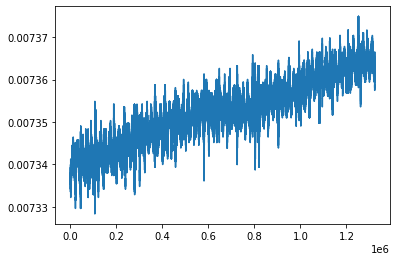

C:\Users\david\OneDrive\Documents\University\Year III\semester A\77335\signal_processing\venv\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


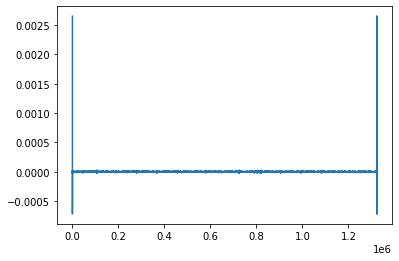

In [34]:
filename = r"measurments\song\Cat Ievan Polkka (320 kbps).wav"
fc = 400_020# Hz
duration = 30 # sec
rate = 1_000_000 # Hz
mod_offset = 0 # v
offset = 4 # v
band_radius = 40_000 # Hz
outname = f"measurments\song_am\song_AM_fc{fc}d{duration}r{rate}.pickle"
sample_rate, data = wavfile.read(filename)

data = np.array(data[:, 0] / (2 ** 15 - 1))
msg = data[0:duration * sample_rate]
t = np.linspace(0, duration, msg.size)

crr = np.cos(t*fc*2*np.pi)
sig = crr*(msg+mod_offset)

rx = md.take_measurements(sig, rate, offset)
norm_rx = (rx-np.average(rx))*(2/(rx.max()-rx.min()))

def band_pass(sig, rate, low, high):
    sig_fft = fft.fft(sig)
    abs_freq = np.abs(fft.fftfreq(sig_fft.size, 1/rate))
    sig_fft[abs_freq>high]=0
    sig_fft[abs_freq<low]=0
    return fft.ifft(sig_fft)

rx_data = band_pass(rx*crr, rate, 20, band_radius)*4
plt.plot(rx)
plt.show()
plt.plot(rx_data)
plt.show()
wavfile.write(f"measurments\song_am\cat_AM_br{band_radius}.wav", sample_rate, (np.clip(np.real(rx_data), -1, 1)*(2 ** 15 - 1)).round().astype("int16"))

with open(outname, "wb+") as f:
    pickle.dump(
        {
            "signal": sig,
            "offset":offset,
            "received": rx,
            "received data": rx_data,
            "interval": duration,
            "rate": rate,
            "time": time(),
            "carrier freq": fc,
            "tx_offset": offset,
            "modulation offset":mod_offset,
            "time line": t
        }, f)


## Amp mod & demod (just testing)

C:\Users\david\OneDrive\Documents\University\Year III\semester A\77335\signal_processing\venv\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


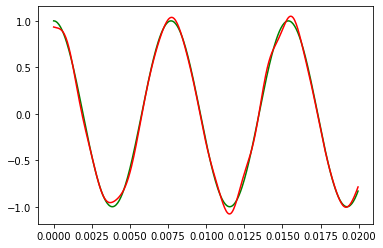

In [43]:
fr = 130 # Hz
fc = 5020# Hz
amp = 1 # v
mod_offset = 0 # v
offset = 0 # v
duration = 0.5 # Sec
rate = 20000 # Hz
band_radius = 700
t = np.linspace(0, duration, round(duration * rate))

def band_pass(sig, rate, low, high):
    sig_fft = fft.fft(sig)
    abs_freq = np.abs(fft.fftfreq(sig_fft.size, 1/rate))
    sig_fft[abs_freq>high]=0
    sig_fft[abs_freq<low]=0
    return fft.ifft(sig_fft)
    
msg = amp*np.cos(t*fr*2*np.pi)
crr = np.cos(t*fc*2*np.pi)
sig = crr*(msg+mod_offset)

# rx = md.take_measurements(sig, rate, 0)
rx = sig
rx_data = band_pass(rx*np.exp(t*fc*2j*np.pi), rate, 0.1, band_radius)
plt.plot(t[:400], msg[:400], "g", t[:400], 4*rx_data[:400],"r")
plt.show()

## Doppler
 *  check the speed in each case.

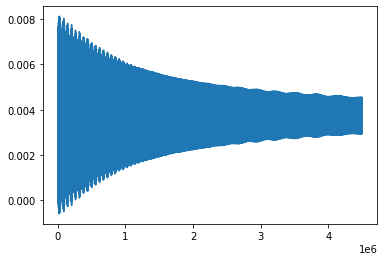

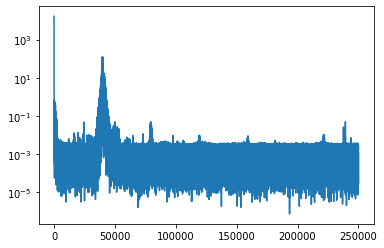

In [29]:
speed = -1  # change when changing the speed
# positive = close to each other
# negative = far from each other
moving_part = "rec"  # or "tr"
fr = 40_000 # Hz
duration = 9 # Sec
rate = 500_000 # Hz
t = 1
filename = f"measurments\doppler\doppler_s{speed}mov'{moving_part}'_take{t}.pickle"
# filename = r"measurments\doppler\noise.pickle"
values = md.take_measurements2(duration, rate)
# r,t = values
# print(f"{r.shape=}")
# print(f"{t.shape=}")
# plt.plot(t)
# plt.title("t")
# plt.show()
# plt.plot(r)
# plt.title("r")
# plt.show()
plt.plot(values)
plt.show()
sim.show_fft(values, duration)
with open(filename, "wb+") as f:
    pickle.dump({
        "speed":speed,
        "moving part": moving_part,
        "data freq": fr,
        "received": values,
        "interval": duration,
        "rate": rate,
        "time": time()
    }, f)
# with open(filename, "wb+") as f:
#     pickle.dump({
#         "data freq": fr,
#         "received": values,
#         "interval": duration,
#         "rate": rate,
#         "time": time()
#     }, f)
